## in-vehicle-copoun-Recommendation Data Set

In [2]:
# load the necessary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import tkinter
matplotlib.use('TkAgg')

# Enable inline plotting
%matplotlib inline
plt.style.use('ggplot')

#### Load the data into pandas and explore the general characteristics

In [3]:
fileName = r'../../data/in-vehicle-coupon-recommendation.csv'
df = pd.read_csv(fileName, sep=',', na_values = ['?'])

# the first top 10 records
df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
# look at the last five records
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


#### DataFrame meta data

In [5]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### Transform the object data types to Categorical data types.

In [7]:
# df.select_dtypes(include=['object'])
inVechicle_obj = df.select_dtypes(include=['object']).copy() # get a copy of the object column names

# loop through the inVechicle_obj column names 
# and convert each column of the original data frame to the category data type  
for colName in inVechicle_obj.columns:
    df[colName] = df[colName].astype('category')
    
df.dtypes

destination             category
passanger               category
weather                 category
temperature                int64
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
car                     category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

<p>There are 26 columns.</p>

In [8]:
df.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


#### unique values of the some of the categorical attributes

In [9]:
df['destination'].unique()

['No Urgent Place', 'Home', 'Work']
Categories (3, object): ['Home', 'No Urgent Place', 'Work']

In [10]:
df['passanger'].unique()

['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
Categories (4, object): ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']

In [11]:
df['weather'].unique()

['Sunny', 'Rainy', 'Snowy']
Categories (3, object): ['Rainy', 'Snowy', 'Sunny']

In [12]:
df['coupon'].unique()

['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']
Categories (5, object): ['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(20-50)', 'Restaurant(<20)']

In [13]:
df['car'].unique()

[NaN, 'Scooter and motorcycle', 'crossover', 'Mazda5', 'do not drive', 'Car that is too old to install Onstar :D']
Categories (5, object): ['Car that is too old to install Onstar :D', 'Mazda5', 'Scooter and motorcycle', 'crossover', 'do not drive']

In [14]:
df['Bar'].unique()

['never', 'less1', '1~3', 'gt8', NaN, '4~8']
Categories (5, object): ['1~3', '4~8', 'gt8', 'less1', 'never']

In [15]:
df['CoffeeHouse'].unique()

['never', 'less1', '4~8', '1~3', 'gt8', NaN]
Categories (5, object): ['1~3', '4~8', 'gt8', 'less1', 'never']

In [16]:
df['occupation'].unique()

['Unemployed', 'Architecture & Engineering', 'Student', 'Education&Training&Library', 'Healthcare Support', ..., 'Protective Service', 'Food Preparation & Serving Related', 'Production Occupations', 'Building & Grounds Cleaning & Maintenance', 'Farming Fishing & Forestry']
Length: 25
Categories (25, object): ['Architecture & Engineering', 'Arts Design Entertainment Sports & Media', 'Building & Grounds Cleaning & Maintenance', 'Business & Financial', ..., 'Sales & Related', 'Student', 'Transportation & Material Moving', 'Unemployed']

In [17]:
df.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

<p>We learn that toCoupon_GEQ5min has one unique value, which will not be beneficial to our analysis so we shall have to drop that attribute.</p>

#### Let's find out if we have any missing values

In [18]:
df.isnull()[0:10]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [19]:
#### determining the number of missing values in each column
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<p>Car, Bar, CoffeeHouse CarryAway,RestaurantLessThan20 and Restaurant20To50 have missing values.</p>

In [20]:
#### let's summarize the class distributiondf.values

In [21]:
# extract the last column, wich is the target class label
classLabel = df.values[:, -1]
classCollection = Counter(classLabel) 

for key, value in classCollection.items():
    percentDist = value / len(classLabel) * 100
    print('classLabel=%s, Count=%s, PercentDistribution=%s%%' %(key, value, round(percentDist,2)))

classLabel=1, Count=7210, PercentDistribution=56.84%
classLabel=0, Count=5474, PercentDistribution=43.16%


<p>We learn that attribute Y consists of two classes whose distribution amongest the data set is shown above.</p>

In [22]:
# from pandas_profiling import ProfileReport
# dfProfile = ProfileReport(df, title = "Profiling Report")
# dfProfile

In [23]:
#### Distribution charts of all the categorical data types

In [24]:
df.select_dtypes('category').columns

Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')

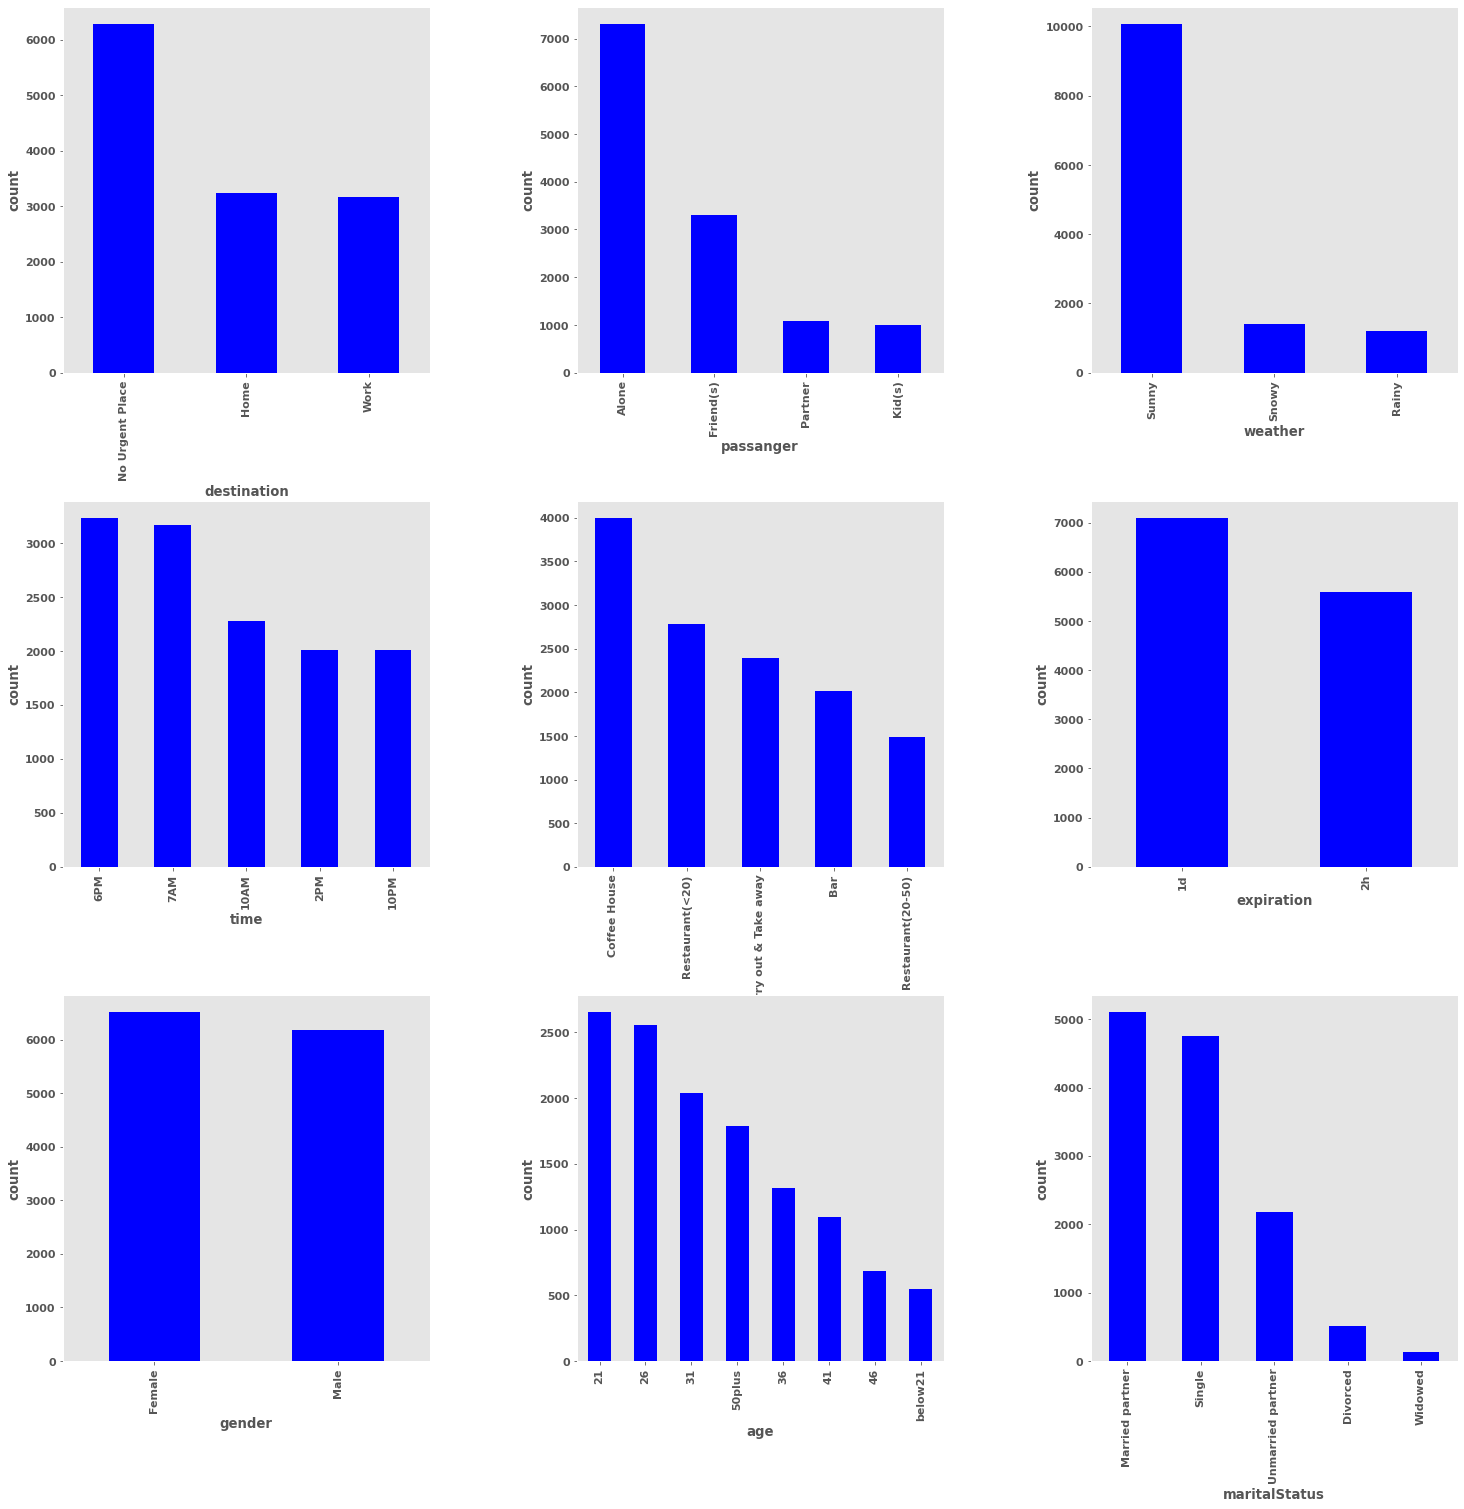

In [71]:
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top.


fig = plt.figure(figsize=(25, 5)) # set the size of the container
fig.subplots_adjust(bottom = -7.0, wspace = 0.4, hspace = 0.35) # add space between each row of the subplots

inVechCategorical_df = df.select_dtypes(include=['category']).copy()
# extract out all the column names
categorical_attrs = inVechCategorical_df.columns

axisnum = 0
#type(categorical_attrs)
for i in range(len(categorical_attrs)-9):
    #print(categorical_attrs[i])
    
    axisnum += 1
    ax = fig.add_subplot(6, 3, axisnum)
    
    

    df[categorical_attrs[i]].value_counts().plot(kind = 'bar', grid = False, color=['blue'], xlabel = categorical_attrs[i], ylabel = 'count')

       
plt.show()

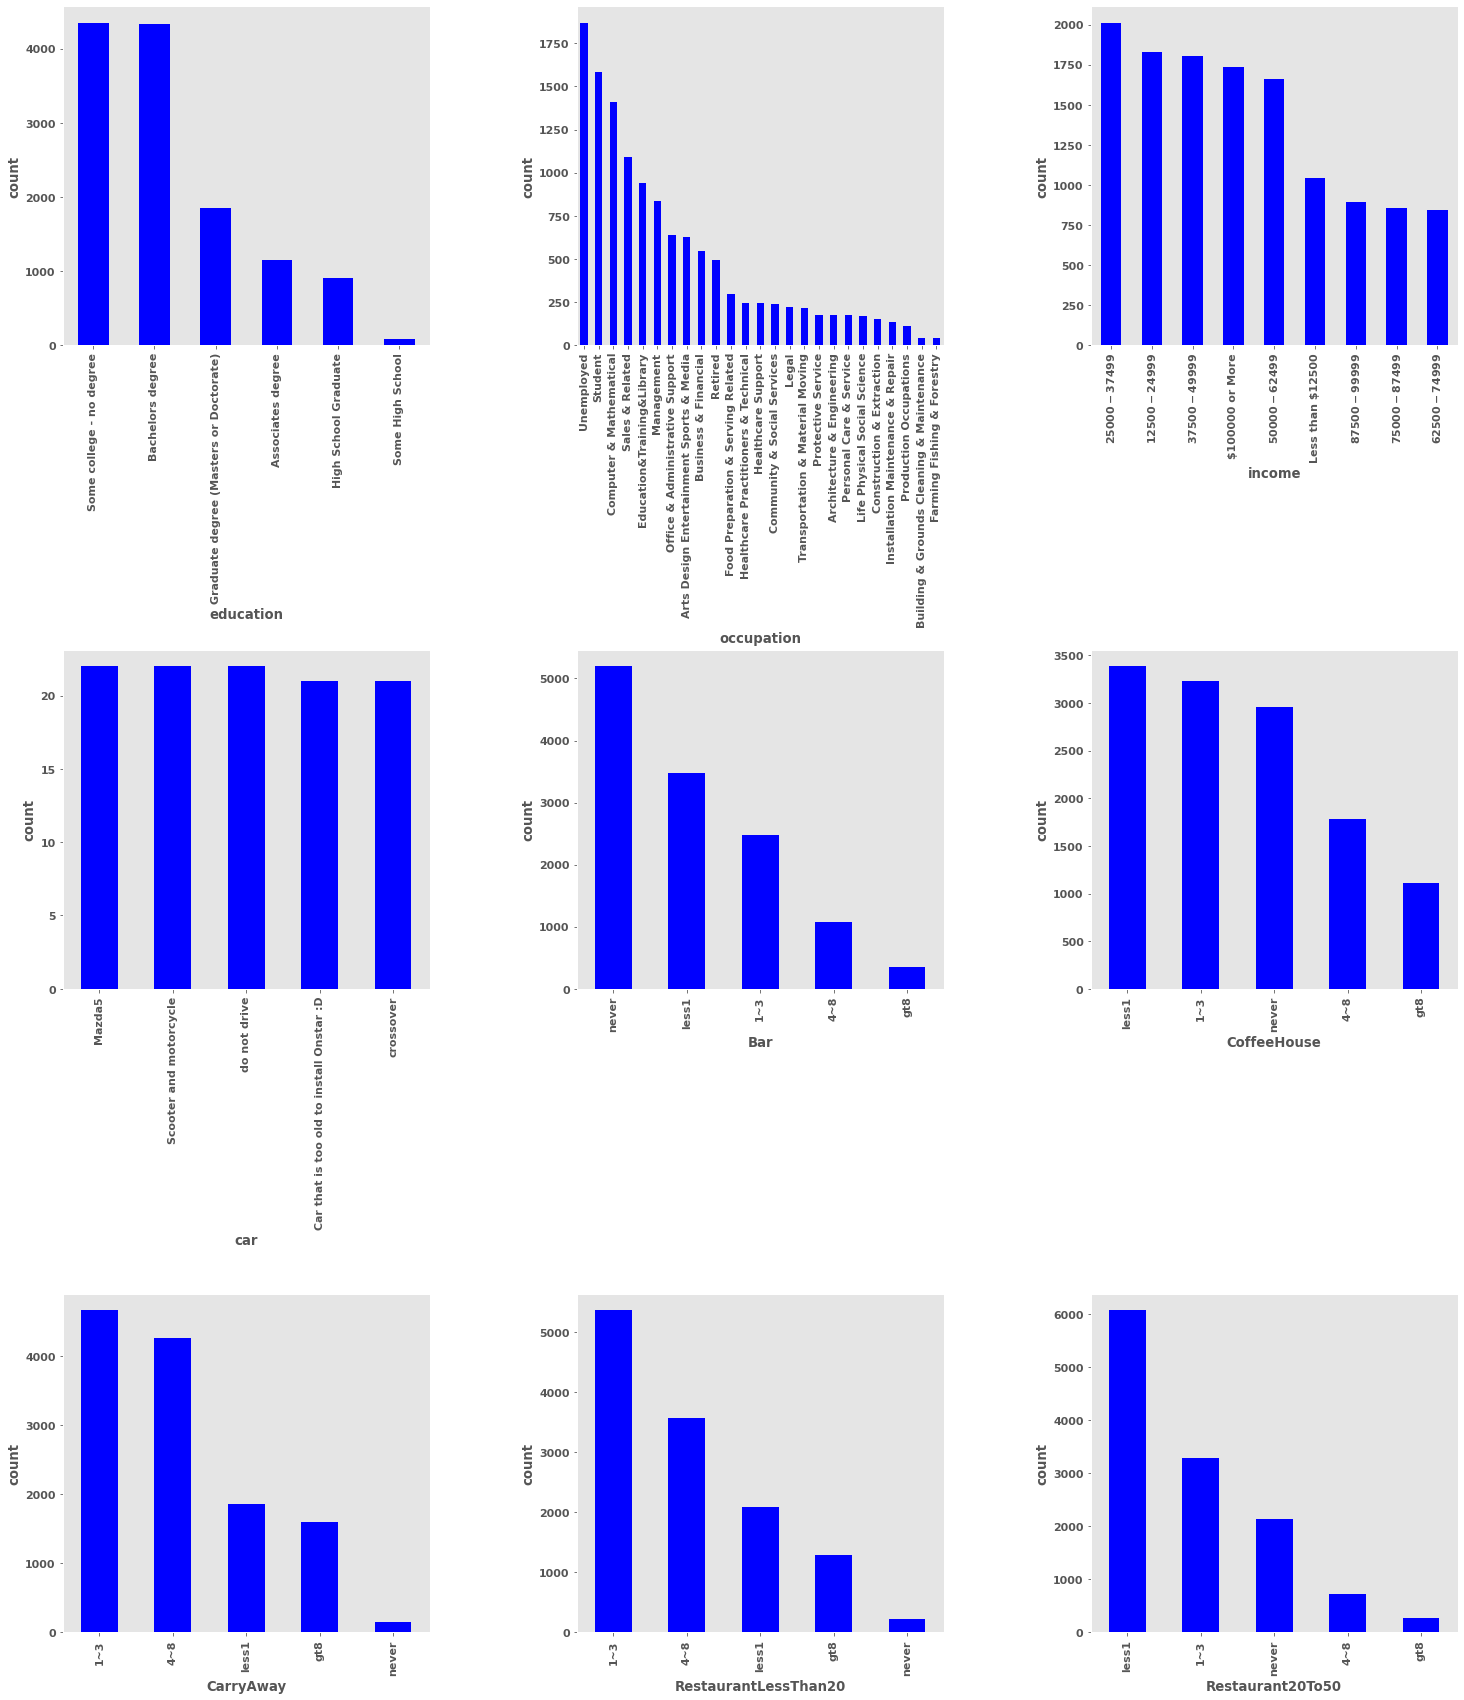

In [82]:
 CategoricalRe = ['education', 'occupation', 'income','car', 'Bar'
                  , 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']
    
plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top.

fig = plt.figure(figsize=(25, 5)) # set the size of the container
fig.subplots_adjust(bottom = -9, wspace = 0.4, hspace = 0.9) # add space between each row of the subplots

#inVechCategorical_df = df.select_dtypes(include=['category']).copy()
# extract out all the column names
#categorical_attrs = inVechCategorical_df.columns
axisnum = 0
#type(categorical_attrs)
for i in range(len(CategoricalRe)):
    #print(categorical_attrs[i])
    
    axisnum += 1
    ax = fig.add_subplot(6, 3, axisnum)
    df[CategoricalRe[i]].value_counts().plot(kind = 'bar', grid = False, color=['blue'], xlabel = CategoricalRe[i], ylabel = 'count')
plt.show()
    
    